In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

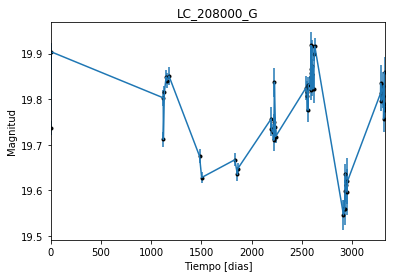

In [2]:
data = np.genfromtxt('LC_208000_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_208000_G')
plt.savefig("LC_208000_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

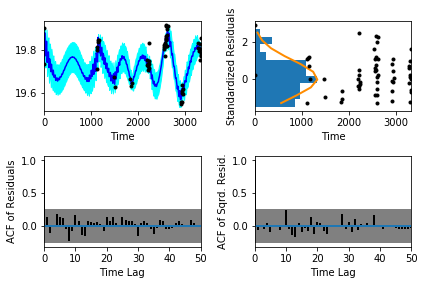

In [5]:
sample.assess_fit()

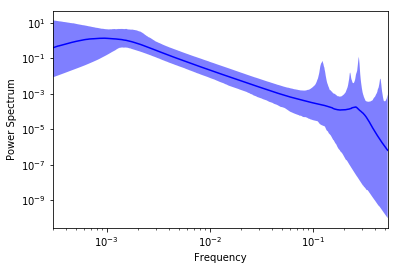

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

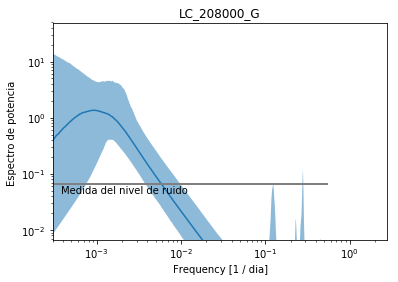

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_208000_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_208000_G')

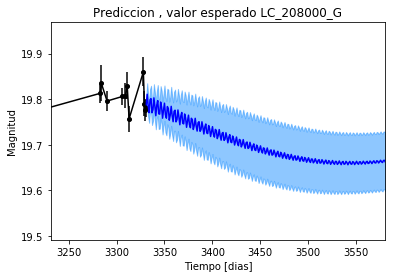

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_208000_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_208000_G')

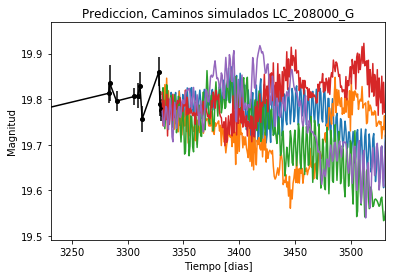

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_208000_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


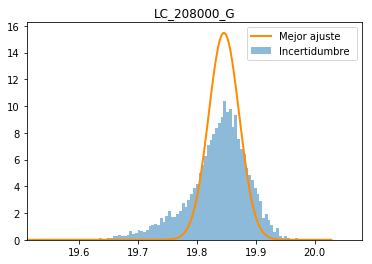

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_208000_G')
plt.savefig("Mejor_ajuste_LC_208000_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_208000_g')

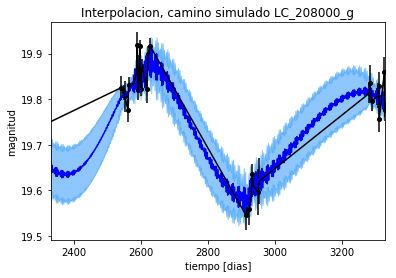

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_g')

Text(0.5,1,'Interpolacion, camino simulado LC_208000_G')

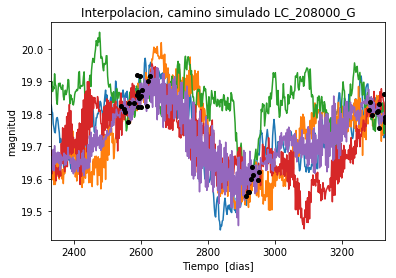

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 486.691417606
Median: 0.00390835181628
Standard deviation: 0.0644762598921
68% credibility interval: [ 0.00123882  0.01317461]
95% credibility interval: [ 0.00045707  0.08001971]
99% credibility interval: [  3.31996189e-04   5.38723051e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 353.915553528
Median: 0.00387422848233
Standard deviation: 0.0421213064083
68% credibility interval: [ 0.00123734  0.01275124]
95% credibility interval: [ 0.00045522  0.06913418]
99% credibility interval: [ 0.000332    0.29299886]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 299.978889068
Median: 0.000625991815268
Standard deviation: 0.263

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 233.733903185
Median: 119.102896264
Standard deviation: 3.12687507836
68% credibility interval: [ 115.72811229  121.67368104]
95% credibility interval: [ 111.45110856  123.88066882]
99% credibility interval: [ 108.89506441  124.80206773]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 151.013582941
Median: 0.14126056398
Standard deviation: 1.76535461023
68% credibility interval: [ 0.03392269  2.94336005]
95% credibility interval: [ 0.01625613  6.11574523]
99% credibility interval: [ 0.01180701  6.93143859]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 246.780838714
Median: 3.08078660207
Standard deviation: 6.92854821617
68% credibility interval: [  0.64017818  11.43686997]
95% credibility interval: [  0.50638827  2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15151.3095072
Median: 5.31377056179e+24
Standard deviation: 2.63424238473e+41
68% credibility interval: [  1.76424127e-31   3.75438638e+36]
95% credibility interval: [  2.74334835e-82   1.45453726e+39]
99% credibility interval: [  7.95287782e-112   3.09219510e+041]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 681.041682719
Median: 19.7393796973
Standard deviation: 0.0343305128913
68% credibility interval: [ 19.71563775  19.76894056]
95% credibility interval: [ 19.67830893  19.82173324]
99% credibility interval: [ 19.63463638  19.86430326]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 83.7347443463
Median: 0.27703748962
Standard deviation: 0.189796852302
68% credibility interval: [ 0.12594368  0.51152404]
95% credibility interval: [ 0.09220645  0.77665833]
99% credibility interval: [ 0.          0.89886956]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 83.7347443463
Median: 0.27703748962
Standard deviation: 0.189796852302
68% credibility interval: [ 0.12594368  0.51152404]
95% credibility interval: [ 0.09220645  0.77665833]
99% credibility interval: [ 0.          0.89886956]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 250.660981288
Median: 0.000684126729089
Standard deviation: 0.000715543298

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 233.733903185
Median: 119.102896264
Standard deviation: 3.12687507836
68% credibility interval: [ 115.72811229  121.67368104]
95% credibility interval: [ 111.45110856  123.88066882]
99% credibility interval: [ 108.89506441  124.80206773]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 501.172604632
Median: 0.00867293396628
Standard deviation: 0.00620658056514
68% credibility interval: [ 0.00593166  0.01426217]
95% credibility interval: [ 0.00417611  0.0288616 ]
99% credibility interval: [ 0.00331761  0.04012112]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 403.005232788
Median: 1.07156791311
Standard deviation: 0.252970546625
68% credibility interval: [ 0.88499395  1.35085058]
95% credibility interval: [ 0.73703623  1.75318676]
99% credibility interval: [ 0.67011188  1.93871285]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 171.650936403
Median: 4.05699044045e-27
Standard deviation: 0.160533312115
68% credibility interval: [  1.77538159e-39   8.33561257e-02]
95% credibility interval: [  1.05487886e-41   4.91429356e-01]
99% credibility interval: [  1.92833628e-44   9.66316442e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 486.691417606
Median: (-0.0245568987073-1.16738621478j)
Standard deviation: 1.25946184196
68% credibility interval: [-0.08277849-0.97539412j -0.00778375-0.7870461j ]
95% credibility interval: [-0.50277866-5.93838084j -0.00287188-1.40637499j]
99% credibility interval: [ -3.38489676e+00+0.j          -2.08599358e-03-0.78028941j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 353.915553528
Median: (-0.0243424954769+1.65885679366j)
Standard deviation: 1.22154316674
68% credibility interval: [-0.08011840+1.77363098j -0.00777446+1.74471588j]
95% credibility interval: [-0.43438284+0.39736873j -0.00286025+1.63672547j]
99% credibility interval: [-1.84096616+0.35094498j -0.00208599+0.78028941j]
Posterior summary for parameter ar